# E-tivity 3: Clustering and Manifold Learning

## Student Name: Garret Molloy
## Student ID: 9021906

# Task 1

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

In [57]:
lab3_df = pd.read_csv("loans_dataset_et3.csv")

# Going to drop Credit History for Clustering

del lab3_df['Credit_History']
lab3_data = np.array(lab3_df.values, dtype=float)
print('(number of examples, number of attributes): ', lab3_data.shape)

(number of examples, number of attributes):  (332, 4)


In [58]:
lab3_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843
std,4584.815491,1982.742932,75.544237,61.651497
min,645.000000,0.000000,17.000000,60.000000
25%,2912.750000,0.000000,100.000000,360.000000
50%,3858.500000,1211.500000,128.000000,360.000000
75%,5818.250000,2250.000000,162.000000,360.000000
max,39999.000000,20000.000000,600.000000,480.000000


In [59]:
lab3_df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,2483,2466.0,90,180
1,4917,0.0,130,360
2,4106,0.0,40,180
3,3859,3300.0,142,180
4,6417,0.0,157,180


### B. Scale the Data


In [60]:
min_max_scaler = preprocessing.MinMaxScaler()
lab3_data = min_max_scaler.fit_transform(lab3_data)

In [61]:
lab3_data[0]

array([0.04670427, 0.1233    , 0.12521441, 0.28571429])

### C. Scatterplot Function (to be used below for visualising a clustering)


In [62]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering
Number of clusters

In [63]:
k = 3

#### Run k-Means

In [64]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(lab3_data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

In [65]:
# append the cluster centers to the dataset
lab3_data_and_centers = np.r_[lab3_data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [66]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(lab3_data_and_centers)
print("transformation complete")

transformation complete


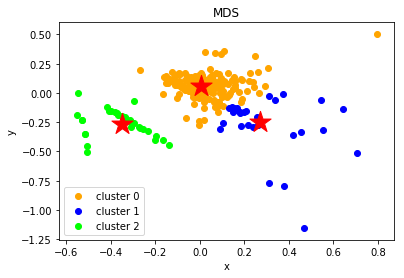

In [67]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [68]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(lab3_data_and_centers)
print("transformation complete")

transformation complete


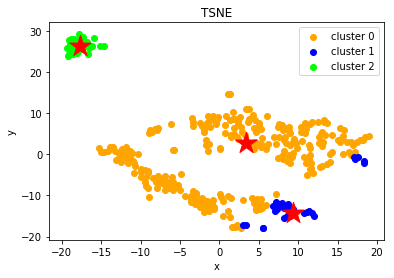

In [69]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [46]:
lab3_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=lab3_df.index)

In [47]:
lab3_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,0
1,4917,0.0,130,360,0,0
2,4106,0.0,40,180,1,1
3,3859,3300.0,142,180,1,1
4,6417,0.0,157,180,1,1


#### Compute the mean value of each attribute for each cluster

In [48]:
lab3_df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,9153.857143,2098.142857,206.285714,308.571429,0.0
1,5115.956923,1482.528985,139.473846,342.424615,1.0


In [ ]:
Now I think I need to ignore the feature Creit History 

Also not liking my TSNE plot so will update

Droped Credit History - now need to tune my cluster plots


